In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display



%matplotlib inline
sns.set_style('darkgrid')

In [3]:
booking_df_ol = pd.read_csv('Booking_cleaned.csv')

In [4]:
booking_df_ol.head()

,Name,NumOfWeekendDays,Nights,RoomType,BedType,Breakfast,Review,Rating,Score,Cancellation,...,Location_Wall Street - Financial District,SnapShotMonth,SnapShotDay,CheckinMonth,CheckinDay,CheckoutMonth,CheckoutDay,TTT,LOS,PricePerNight
0,Pestana Park Avenue,0.0,1.0,3.0,5,0,850,7.0,8.5,0,...,0,3,1,3,2,3,3,1,2.0,199.0
1,Margaritaville Resort Times Square,0.0,1.0,6.0,6,0,1355,8.0,8.8,0,...,0,3,1,3,2,3,3,1,2.0,149.0
2,The Tuscany Powered by LuxUrban,0.0,1.0,3.0,6,0,45,6.0,7.9,1,...,0,3,1,3,2,3,3,1,2.0,86.0
3,Pod Times Square,0.0,1.0,3.0,4,0,12746,7.0,8.1,0,...,0,3,1,3,2,3,3,1,2.0,99.0
4,Hyatt Place New York City/Times Square,0.0,1.0,6.0,6,1,14983,6.0,7.6,0,...,0,3,1,3,2,3,3,1,2.0,155.0


In [5]:
booking_df_ol.shape

(41004, 47)

In [6]:
## IQR = Q3 - Q1
## Price
price_q1 , price_q3 = np.percentile(booking_df_ol['Price'],[25,75])
priceIQR = (price_q3 - price_q1)
priceTUK = price_q3 + (1.5 * (priceIQR))

In [7]:
#remove outliers from 'Price'
#CODE HERE
booking_df = booking_df_ol[~(booking_df_ol['Price'] > (priceTUK))]

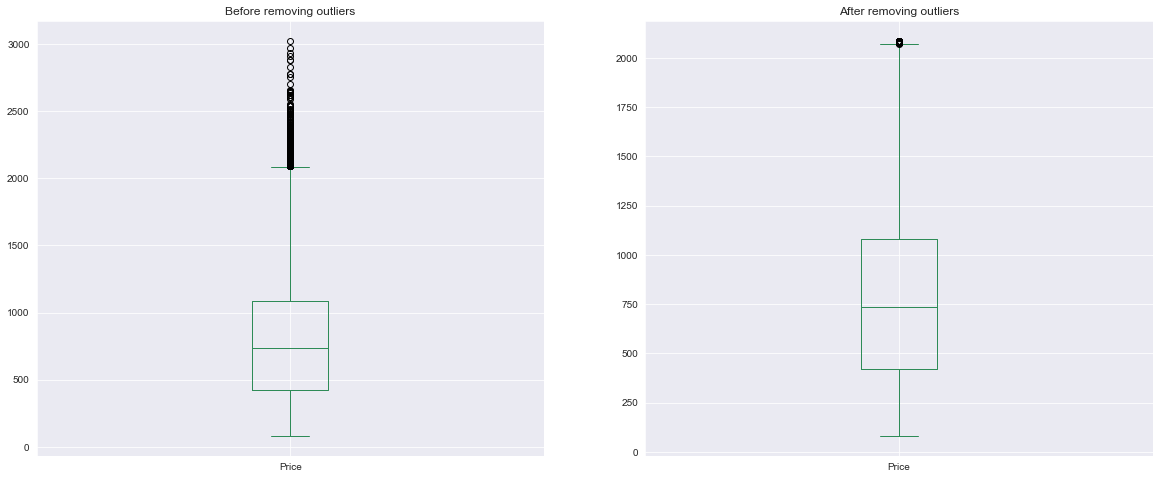

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
booking_df_ol['Price'].plot(kind='box', title='Price',color='seagreen',ax=ax1)
ax1.title.set_text('Before removing outliers')
booking_df['Price'].plot(kind='box', title='Price',color='seagreen',ax=ax2)
ax2.title.set_text('After removing outliers')
plt.show()

In [9]:
booking_df.shape

(40706, 47)

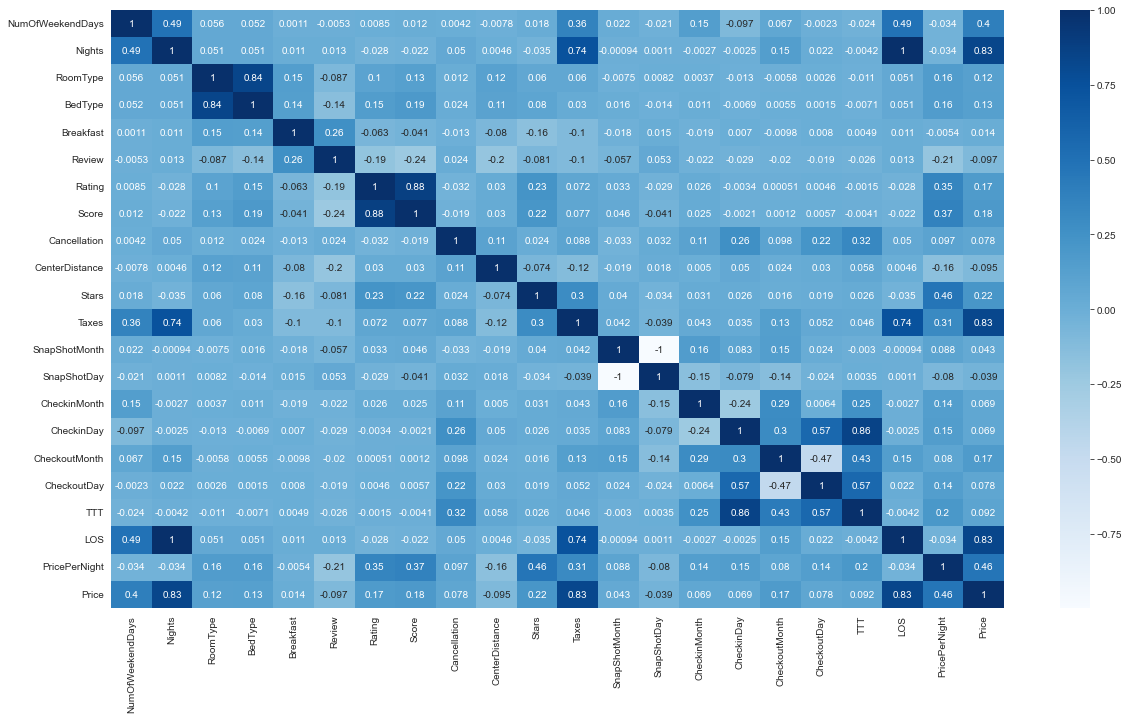

In [10]:
plt.figure(figsize=(20,11))
sns.heatmap(booking_df[['NumOfWeekendDays','Nights','RoomType','BedType','Breakfast','Review','Rating',
                             'Score','Cancellation','CenterDistance','Stars','Taxes','SnapShotMonth',
                             'SnapShotDay','CheckinMonth','CheckinDay','CheckoutMonth','CheckoutDay',
                             'TTT','LOS','PricePerNight','Price']].corr(),annot=True,cmap='Blues')
plt.show()

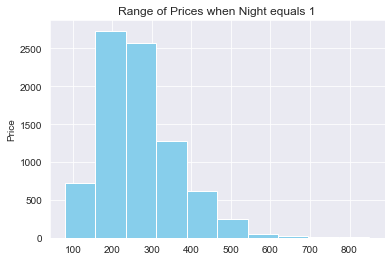

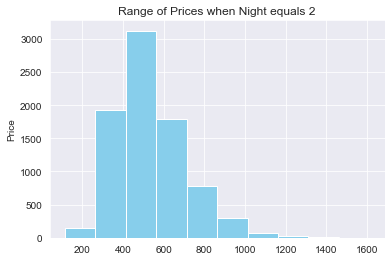

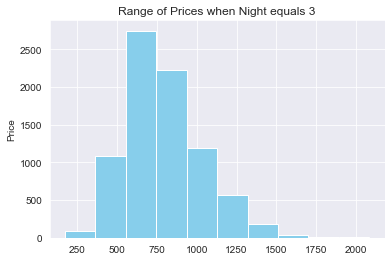

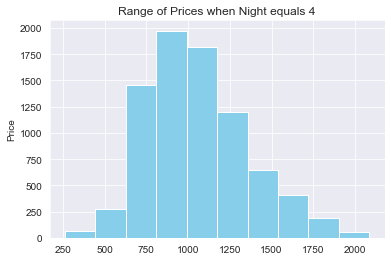

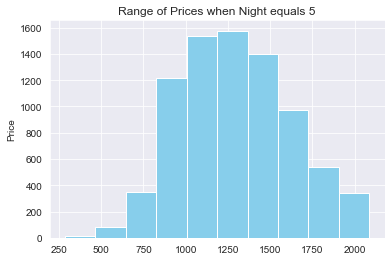

In [11]:
for night in range(1, 6):
    # create boolean index based on Night column
    night_index = booking_df['Nights'] == night

    # select Price values where Night equals current value
    prices_night = booking_df.loc[night_index, 'Price']

    # create boxplot
    plt.hist(prices_night,color='skyblue')
    plt.title(f"Range of Prices when Night equals {night}")
    plt.ylabel('Price')
    plt.show()

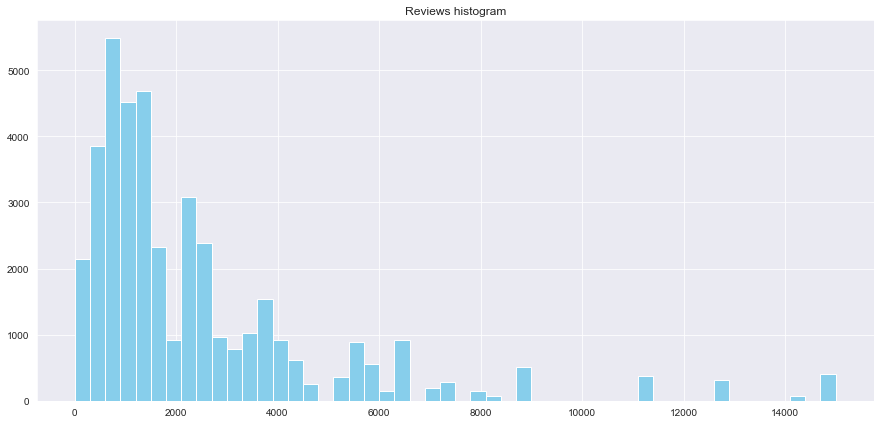

In [12]:
plt.figure(figsize = (15,7))
plt.hist('Review',data = booking_df,bins = 50,color='skyblue')
plt.title('Reviews histogram')
plt.show()

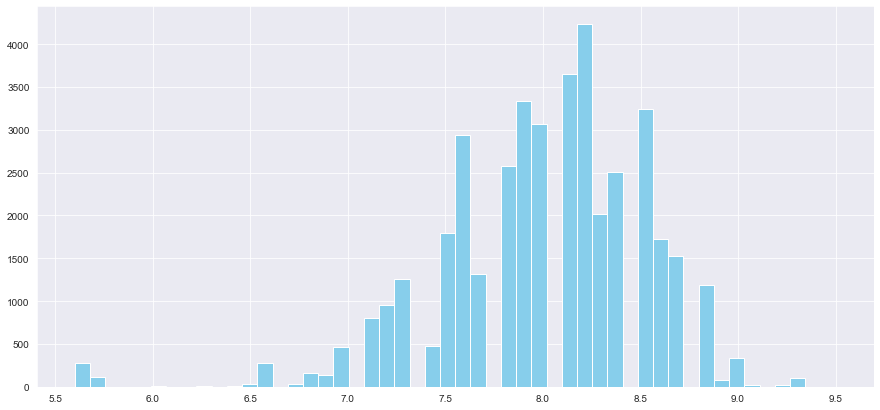

In [43]:
plt.figure(figsize = (15,7))
plt.hist('Score',data = booking_df,bins = 50,color='skyblue')
plt.show()

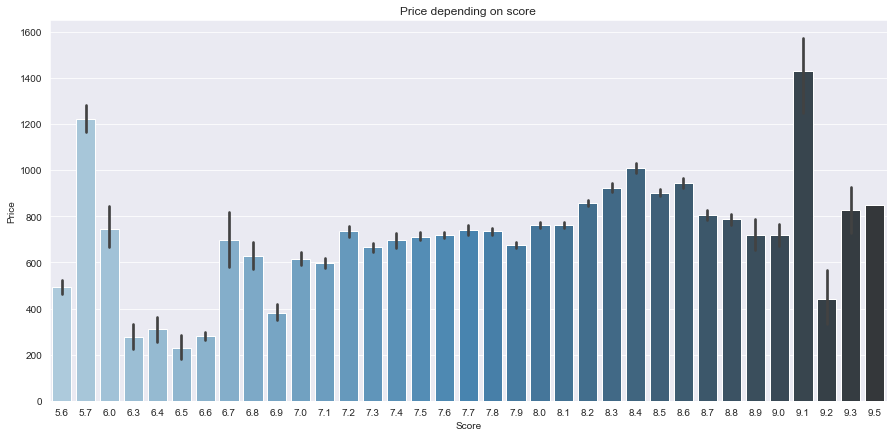

In [13]:
plt.figure(figsize = (15,7))
sns.barplot(x='Score',y='Price',data=booking_df, palette='Blues_d')
plt.title('Price depending on score')
plt.show()

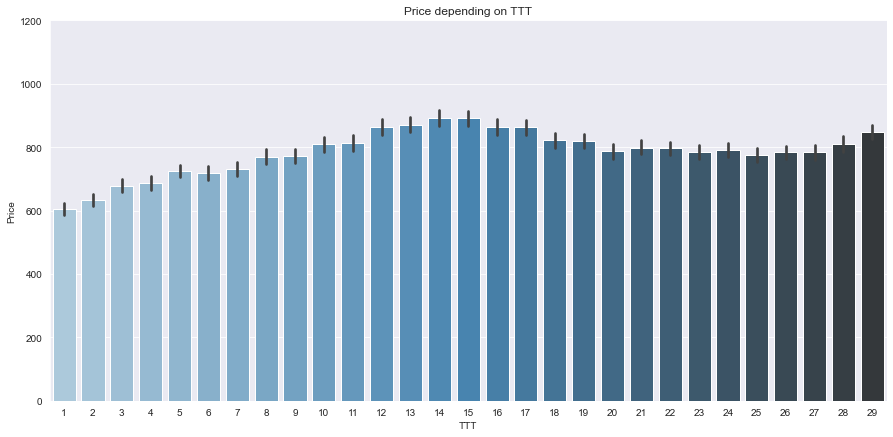

In [33]:
plt.figure(figsize = (15,7))
sns.barplot(x='TTT',y='Price',data=booking_df, palette='Blues_d')
plt.title('Price depending on TTT')
plt.ylim(0, 1200)
plt.show()

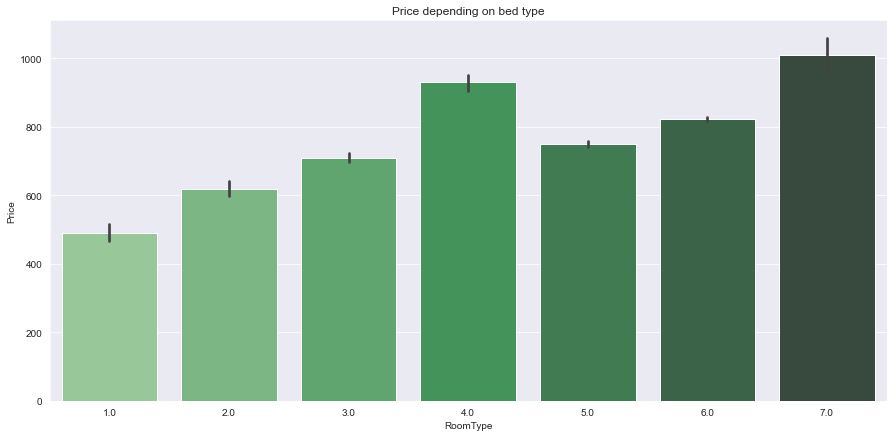

In [14]:
plt.figure(figsize = (15,7))
sns.barplot(x='RoomType',y='Price',data=booking_df, palette='Greens_d')
plt.title('Price depending on bed type')
plt.show()

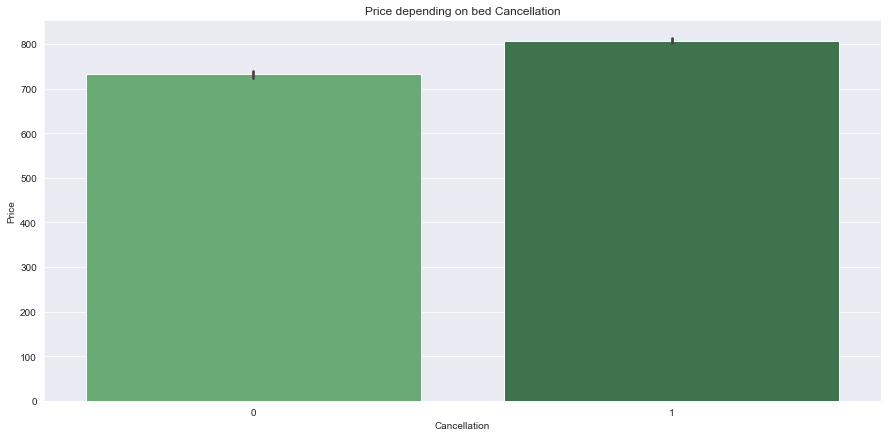

In [35]:
plt.figure(figsize = (15,7))
sns.barplot(x='Cancellation',y='Price',data=booking_df, palette='Greens_d')
plt.title('Price depending on bed Cancellation')
plt.show()

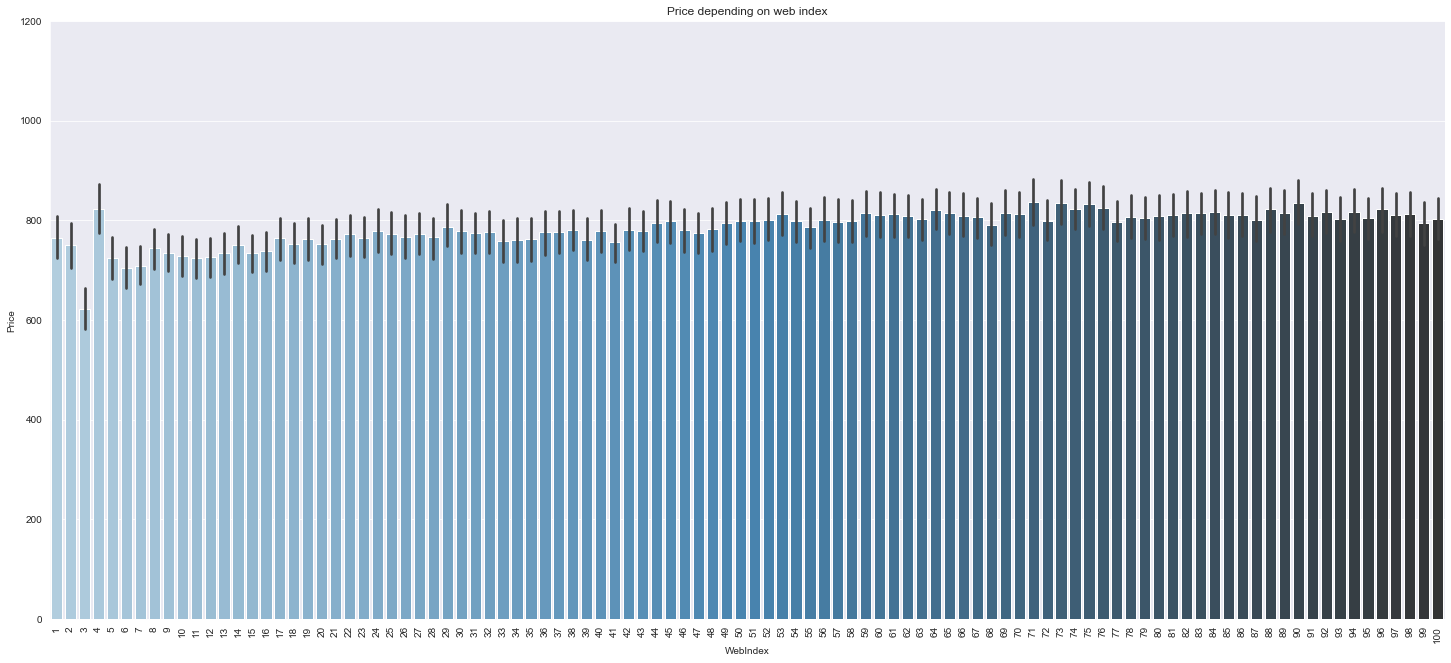

In [18]:
plt.figure(figsize = (25,11))
sns.barplot(x='WebIndex',y='Price',data=booking_df, palette='Blues_d')
plt.title('Price depending on web index')
plt.xticks(rotation= 90)
plt.ylim(0, 1200)
plt.show()

#### We can see that the order booking making to show their hotels does not reflect for more expensive hotels

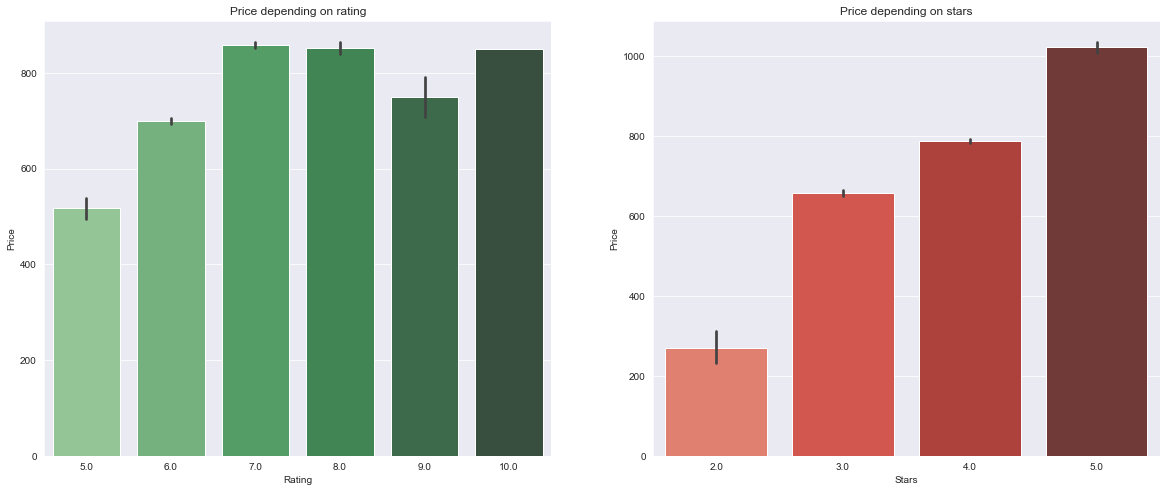

In [19]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
sns.barplot(x='Rating',y='Price',data=booking_df,ax=ax1, palette='Greens_d')
ax1.title.set_text('Price depending on rating')
sns.barplot(x='Stars',y='Price',data=booking_df,ax=ax2, palette='Reds_d')
ax2.title.set_text('Price depending on stars')
plt.show()

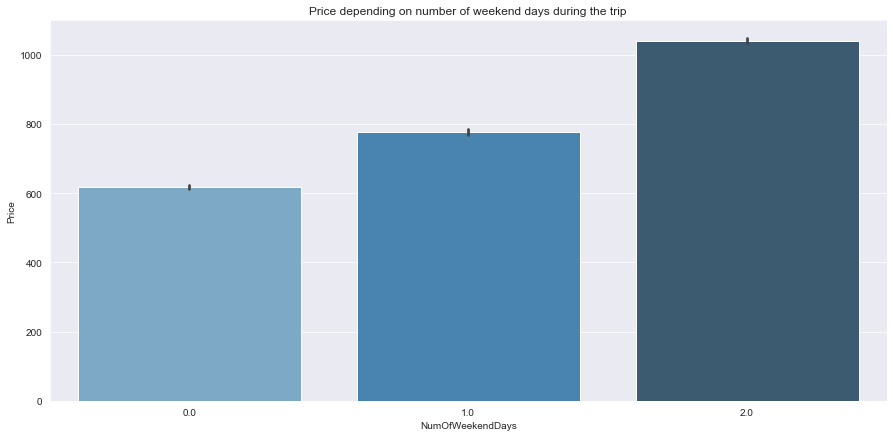

In [20]:
plt.figure(figsize = (15,7))
sns.barplot(x='NumOfWeekendDays',y='Price',data=booking_df, palette='Blues_d')
plt.title('Price depending on number of weekend days during the trip')
plt.show()

#### Going on weekend more expensive then midweek

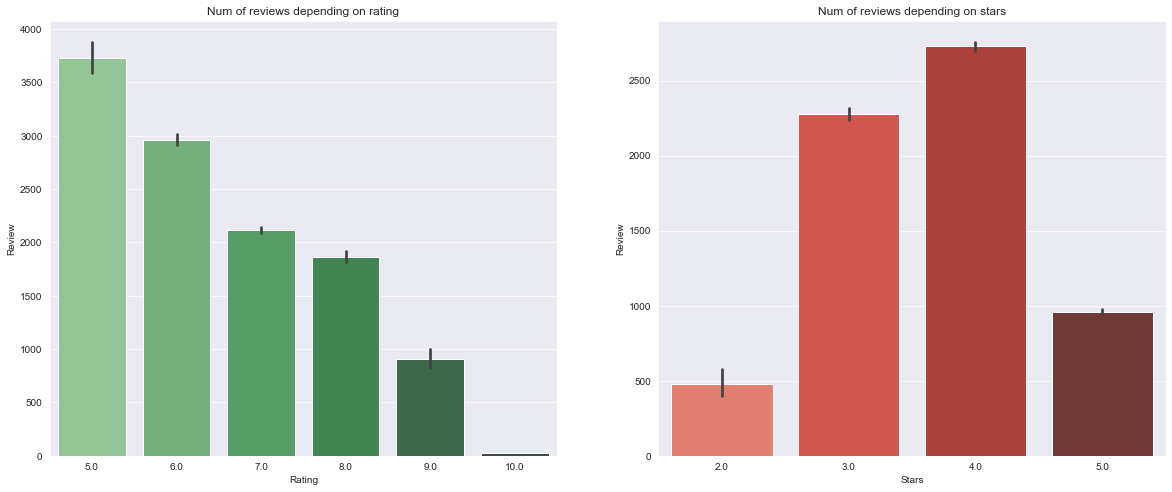

In [21]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
sns.barplot(x='Rating',y='Review',data=booking_df,ax=ax1, palette='Greens_d')
ax1.title.set_text('Num of reviews depending on rating')
sns.barplot(x='Stars',y='Review',data=booking_df,ax=ax2, palette='Reds_d')
ax2.title.set_text('Num of reviews depending on stars')
plt.show()

In [36]:
booking_df_ol.columns

Index(['Name', 'NumOfWeekendDays', 'Nights', 'RoomType', 'BedType',
       'Breakfast', 'Review', 'Rating', 'Score', 'Cancellation',
       'CenterDistance', 'Stars', 'Taxes', 'Price', 'WebIndex',
       'Location_Battery Park', 'Location_Chelsea', 'Location_Chinatown',
       'Location_East Village', 'Location_Flatiron District',
       'Location_Gramercy', 'Location_Greenwich Village', 'Location_Harlem',
       'Location_Hell's Kitchen', 'Location_Hudson Yards', 'Location_Kips Bay',
       'Location_Lower East Side', 'Location_Manhattan',
       'Location_Midtown East', 'Location_Murray Hill', 'Location_New York',
       'Location_NoMad', 'Location_SoHo', 'Location_Tribeca',
       'Location_Union Square', 'Location_Upper East Side',
       'Location_Upper West Side', 'Location_Wall Street - Financial District',
       'SnapShotMonth', 'SnapShotDay', 'CheckinMonth', 'CheckinDay',
       'CheckoutMonth', 'CheckoutDay', 'TTT', 'LOS', 'PricePerNight'],
      dtype='object')

In [37]:
booking_df_location = booking_df_ol[['Location_Battery Park','Location_Chelsea','Location_Chinatown',
                                    'Location_East Village','Location_Flatiron District','Location_Gramercy',
                                    'Location_Greenwich Village','Location_Harlem',"Location_Hell's Kitchen",
                                    'Location_Hudson Yards','Location_Kips Bay','Location_Lower East Side',
                                    'Location_Manhattan','Location_Midtown East','Location_Murray Hill',
                                    'Location_New York','Location_NoMad','Location_SoHo','Location_Tribeca',
                                    'Location_Union Square','Location_Upper East Side','Location_Upper West Side',
                                    'Location_Wall Street - Financial District']]

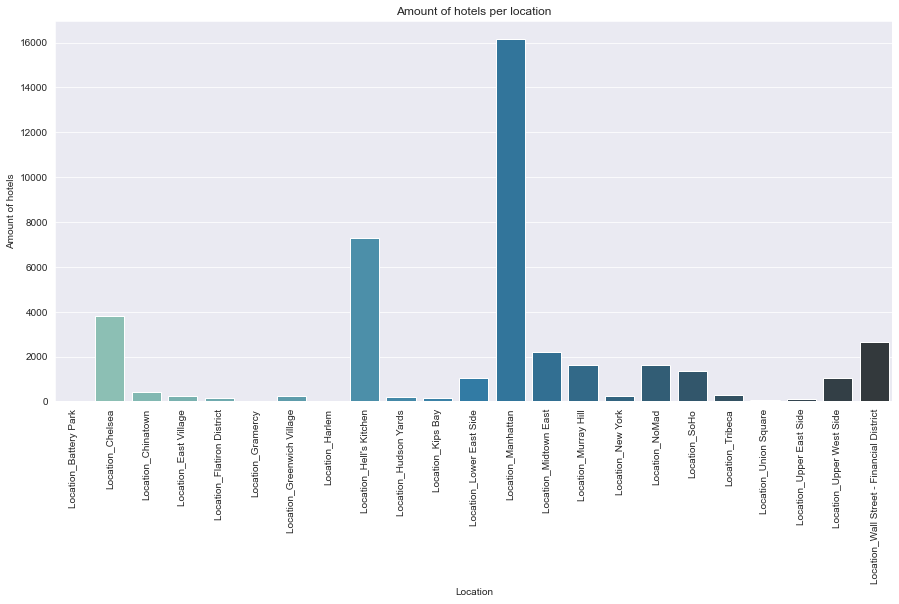

In [38]:
plt.figure(figsize = (15,7))
sums = booking_df_location.sum(axis=0)
sns.barplot(x=sums.index, y=sums.values,palette='YlGnBu_d')
plt.xticks(rotation= 90)
plt.xlabel("Location")
plt.ylabel("Amount of hotels")
plt.title("Amount of hotels per location")
plt.show()

In [27]:
booking_df_grid = booking_df[['NumOfWeekendDays','Nights','RoomType','BedType','Breakfast','Review',
                             'Rating','Score','Cancellation','Stars','Taxes','WebIndex','TTT','LOS','PricePerNight','Price']]

In [28]:
booking_df_grid

,NumOfWeekendDays,Nights,RoomType,BedType,Breakfast,Review,Rating,Score,Cancellation,Stars,Taxes,WebIndex,TTT,LOS,PricePerNight,Price
0,0.0,1.0,3.0,5,0,850,7.0,8.5,0,4.0,56,1,1,2.0,199.0,199
1,0.0,1.0,6.0,6,0,1355,8.0,8.8,0,4.0,91,2,1,2.0,149.0,149
2,0.0,1.0,3.0,6,0,45,6.0,7.9,1,4.0,16,3,1,2.0,86.0,86
3,0.0,1.0,3.0,4,0,12746,7.0,8.1,0,4.0,41,4,1,2.0,99.0,99
4,0.0,1.0,6.0,6,1,14983,6.0,7.6,0,4.0,26,5,1,2.0,155.0,155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40999,2.0,5.0,6.0,6,0,479,6.0,7.3,0,4.0,312,98,29,6.0,243.0,1215
41000,2.0,5.0,6.0,6,0,6415,8.0,8.6,1,4.0,451,99,29,6.0,362.0,1809
41001,2.0,5.0,5.0,5,1,1211,6.0,7.5,0,4.0,385,100,29,6.0,265.0,1326
41002,2.0,5.0,6.0,6,0,1020,7.0,8.2,1,4.0,444,1,29,6.0,345.0,1724


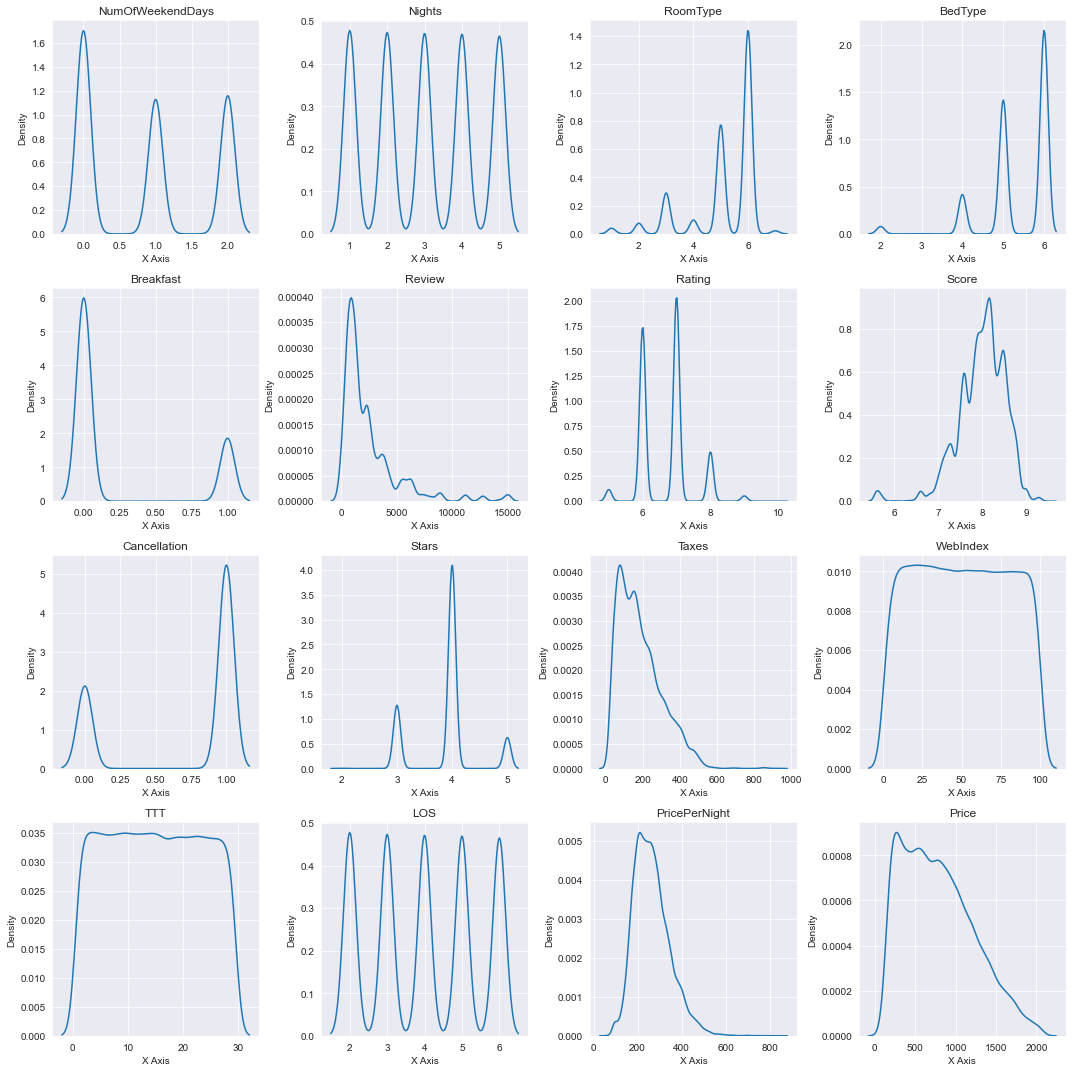

In [30]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))
axs = axs.flatten()

for i, col in enumerate(booking_df_grid.columns):
    sns.kdeplot(booking_df_grid[col], ax=axs[i])
    axs[i].set_title(col)
for ax in axs:
    ax.set_xlabel("X Axis")
    ax.set_ylabel("Density")
    
for i in range(len(booking_df_grid.columns), len(axs)):
    fig.delaxes(axs[i])

    
fig.tight_layout()
plt.show()